### 1. Import necessary Libraries

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes

import folium # plotting library
import json # library to handle JSON files

print('Folium installed')
print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


### 2. Download and Explore NY Dataset

In [5]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load data

In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [6]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

#### Loop through the data and fill the dataframe one row at a time.

In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Get neighborhoods for each borough

In [90]:
Bronx_neigh = neighborhoods.loc[(neighborhoods['Borough'] == 'Bronx')]
Bronx_neigh = Bronx_neigh.reset_index(drop=True)

Manhattan_neigh = neighborhoods.loc[(neighborhoods['Borough'] == 'Manhattan')]
Manhattan_neigh = Manhattan_neigh.reset_index(drop=True)


In [14]:
Brooklyn_neigh = neighborhoods.loc[(neighborhoods['Borough'] == 'Brooklyn')]
Brooklyn_neigh = Brooklyn_neigh.reset_index(drop=True)

Queens_neigh = neighborhoods.loc[(neighborhoods['Borough'] == 'Queens')]
Queens_neigh = Queens_neigh.reset_index(drop=True)

Staten_neigh = neighborhoods.loc[(neighborhoods['Borough'] == 'Staten Island')]
Staten_neigh = Staten_neigh.reset_index(drop=True)

In [91]:
Bronx_neigh.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [92]:
Manhattan_neigh.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [17]:
Brooklyn_neigh.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [18]:
Queens_neigh.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [19]:
Staten_neigh.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


#### Use geopy library to get the latitude and longitude values of New York City and its boroughs

In [93]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [94]:
#Bronx
Bronx_address = 'Bronx, NY'
Bronx_location = geolocator.geocode(Bronx_address)
Bronx_latitude = Bronx_location.latitude
Bronx_longitude = Bronx_location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(Bronx_latitude, Bronx_longitude))

#Manhattan
Manhattan_address = 'Manhattan, NY'
Manhattan_location = geolocator.geocode(Manhattan_address)
Manhattan_latitude = Manhattan_location.latitude
Manhattan_longitude = Manhattan_location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(Manhattan_latitude, Manhattan_longitude))

#Brooklyn
Brooklyn_address = 'Brooklyn, NY'
Brooklyn_location = geolocator.geocode(Brooklyn_address)
Brooklyn_latitude = Brooklyn_location.latitude
Brooklyn_longitude = Brooklyn_location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(Brooklyn_latitude, Brooklyn_longitude))

#Queens
Queens_address = 'Queens, NY'
Queens_location = geolocator.geocode(Queens_address)
Queens_latitude = Queens_location.latitude
Queens_longitude = Queens_location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(Queens_latitude, Queens_longitude))

#Staten Island
Staten_address = 'Staten Island, NY'
Staten_location = geolocator.geocode(Staten_address)
Staten_latitude = Staten_location.latitude
Staten_longitude = Staten_location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(Staten_latitude, Staten_longitude))


The geograpical coordinate of Bronx are 40.8466508, -73.8785937.
The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.
The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.
The geograpical coordinate of Queens are 40.7498243, -73.7976337.
The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


#### Create a map of New York with neighborhoods superimposed on top.

In [95]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    if( borough == 'Bronx'):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)
    elif( borough == 'Manhattan' ):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)
map_newyork        

### 3. Define Foursquare Credentials and Version

In [81]:
CLIENT_ID = 'YIPE0XDZX0RNL3XZYFBWVP2OCWNCBLMHXXZJWPNXRK5URKTN' # your Foursquare ID
CLIENT_SECRET = 'G4H5YBLNT531U4L2AYAOVD1CAGHUIPHLNASL3OXPKUPZJBQ1' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 200 # define radius of 200 meters
search_query = ''

Your credentails:
CLIENT_ID: YIPE0XDZX0RNL3XZYFBWVP2OCWNCBLMHXXZJWPNXRK5URKTN
CLIENT_SECRET:G4H5YBLNT531U4L2AYAOVD1CAGHUIPHLNASL3OXPKUPZJBQ1


#### Define Functions

#### function to repeat the same process to all the neighborhoods in passed boroughs

In [96]:
def getNearbyVenues(borough, names, latitudes, longitudes, category, category_name):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                search_query,
                radius, 
                LIMIT,
                category)
        #print(url)
        # make the GET request
        results = (requests.get(url).json())["response"]["venues"]
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            category_name,
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Category',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Category Values for Search 
##### Vegan/Vegetarian 4bf58dd8d48988d1d3941735
##### Halal 52e81612bcbc57f1066b79ff
##### Kosher 52e81612bcbc57f1066b79fc
##### Gluten Free 4c2cd86ed066bed06c3c5209

#### Bronx

In [97]:
#Vegetarian/Vegan 
Bronx_veg_venues= getNearbyVenues(borough="Bronx",
                    names=Bronx_neigh['Neighborhood'],
                   latitudes=Bronx_neigh['Latitude'],
                   longitudes=Bronx_neigh['Longitude'],
                   category="4bf58dd8d48988d1d3941735",
                    category_name = "Vegetarian/Vegan")

#Halal 
Bronx_hal_venues= getNearbyVenues(borough="Bronx",
                    names=Bronx_neigh['Neighborhood'],
                   latitudes=Bronx_neigh['Latitude'],
                   longitudes=Bronx_neigh['Longitude'],
                   category="52e81612bcbc57f1066b79ff",
                    category_name = "Halal")
#Kosher
Bronx_kosh_venues= getNearbyVenues(borough="Bronx",
                   names=Bronx_neigh['Neighborhood'],
                   latitudes=Bronx_neigh['Latitude'],
                   longitudes=Bronx_neigh['Longitude'],
                   category="52e81612bcbc57f1066b79fc",
                    category_name = "Kosher")
#Gluten Free
Bronx_glue_venues= getNearbyVenues(borough="Bronx",
                  names=Bronx_neigh['Neighborhood'],
                   latitudes=Bronx_neigh['Latitude'],
                   longitudes=Bronx_neigh['Longitude'],
                   category="4c2cd86ed066bed06c3c5209",
                    category_name = "Gluten Free")

Bronx_venues = Bronx_veg_venues.append(Bronx_hal_venues)
Bronx_venues = Bronx_venues.append(Bronx_kosh_venues)
Bronx_venues = Bronx_venues.append(Bronx_glue_venues)

In [99]:
Bronx_venues.to_csv('Bronx_venues.csv')

##### Let's check the size of the resulting dataframe

In [130]:
print(Bronx_venues.shape)
Bronx_venues.head(10)

(13, 9)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Category,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Kingsbridge,40.881687,-73.902818,Vegetarian/Vegan,Kingsbridge-Riverdale Farmers' Market,40.879973,-73.907295,Vegetarian / Vegan Restaurant
1,Bronx,Fordham,40.860997,-73.896427,Vegetarian/Vegan,Veggie Mart,40.861740,-73.890566,Vegetarian / Vegan Restaurant
2,Bronx,Fordham,40.860997,-73.896427,Vegetarian/Vegan,C. Kim's Fruit & Vegetable,40.864635,-73.891895,Vegetarian / Vegan Restaurant
3,Bronx,Country Club,40.844246,-73.824099,Vegetarian/Vegan,Vegetarian Joint,40.842828,-73.825764,Vegetarian / Vegan Restaurant
4,Bronx,Parkchester,40.837938,-73.856003,Vegetarian/Vegan,Tandoori Place,40.836010,-73.853482,Indian Restaurant
5,Bronx,Belmont,40.857277,-73.888452,Vegetarian/Vegan,Veggie Mart,40.861740,-73.890566,Vegetarian / Vegan Restaurant
6,Bronx,Olinville,40.871371,-73.863324,Vegetarian/Vegan,Touch A Life Health Food Services,40.871552,-73.864937,Vegetarian / Vegan Restaurant
7,Bronx,Bronxdale,40.852723,-73.861726,Vegetarian/Vegan,Good N Natural,40.855616,-73.867652,Health Food Store
0,Bronx,Bedford Park,40.870185,-73.885512,Halal,"Kennedy's Chicken, Burgers & Gyros",40.869810,-73.889914,Fried Chicken Joint
1,Bronx,Unionport,40.829774,-73.850535,Halal,packsun halal chicken,40.833913,-73.852301,Halal Restaurant


##### Let's check how many venues were returned for each category

In [101]:
Bronx_venues.groupby('Category')['Venue'].count().sort_values(ascending=False)

Category
Vegetarian/Vegan    8
Halal               2
Gluten Free         2
Kosher              1
Name: Venue, dtype: int64

##### Let's check how many venues were returned for each Neighborhoodh

In [127]:
Bronx_venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)

Neighborhood
Parkchester        2
Fordham            2
Van Nest           1
Unionport          1
Olinville          1
North Riverdale    1
Kingsbridge        1
Country Club       1
Bronxdale          1
Belmont            1
Bedford Park       1
Name: Venue, dtype: int64

#### Manhatten

In [ ]:
#Vegetarian/Vegan 
Manhattan_veg_venues= getNearbyVenues(borough="Manhattan",
                    names=Manhattan_neigh['Neighborhood'],
                   latitudes=Manhattan_neigh['Latitude'],
                   longitudes=Manhattan_neigh['Longitude'],
                   category="4bf58dd8d48988d1d3941735",
                    category_name = "Vegetarian/Vegan")
#Halal 
Manhattan_hal_venues= getNearbyVenues(borough="Manhattan",
                    names=Manhattan_neigh['Neighborhood'],
                   latitudes=Manhattan_neigh['Latitude'],
                   longitudes=Manhattan_neigh['Longitude'],
                   category="52e81612bcbc57f1066b79ff",
                    category_name = "Halal")
#Kosher
Manhattan_kosh_venues= getNearbyVenues(borough="Manhattan",
                   names=Manhattan_neigh['Neighborhood'],
                   latitudes=Manhattan_neigh['Latitude'],
                   longitudes=Manhattan_neigh['Longitude'],
                   category="52e81612bcbc57f1066b79fc",
                    category_name = "Kosher")
#Gluten Free
Manhattan_glue_venues= getNearbyVenues(borough="Manhattan",
                  names=Manhattan_neigh['Neighborhood'],
                   latitudes=Manhattan_neigh['Latitude'],
                   longitudes=Manhattan_neigh['Longitude'],
                   category="4c2cd86ed066bed06c3c5209",
                    category_name = "Gluten Free")

Manhattan_venues = Manhattan_veg_venues.append(Manhattan_hal_venues)
Manhattan_venues = Manhattan_venues.append(Manhattan_kosh_venues)
Manhattan_venues = Manhattan_venues.append(Manhattan_glue_venues)

In [122]:
Manhattan_venues.to_csv('Manhattan_venues.csv')

##### Let's check the size of the resulting dataframe

In [131]:
print(Manhattan_venues.shape)
Manhattan_venues.head(10)

(430, 9)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Category,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,Marble Hill,40.876551,-73.910660,Vegetarian/Vegan,Kingsbridge-Riverdale Farmers' Market,40.879973,-73.907295,Vegetarian / Vegan Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Jisu Vegetarian,40.716050,-73.995348,Vegetarian / Vegan Restaurant
2,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Orchard Grocer,40.717847,-73.990358,Vegetarian / Vegan Restaurant
3,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Petisco Vegano,40.714040,-73.988815,Vegetarian / Vegan Restaurant
4,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Dirt Candy,40.717890,-73.991015,Vegetarian / Vegan Restaurant
5,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Jay Kitchen,40.720457,-73.993342,Vegetarian / Vegan Restaurant
6,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,May Kaidee NYC,40.714046,-73.987465,Vegetarian / Vegan Restaurant
7,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Fruit Stand Outside Of Fairtown Trading Inc.,40.717940,-73.992941,Vegetarian / Vegan Restaurant
8,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Vegetarian Dim Sum House,40.714892,-73.998321,Vegetarian / Vegan Restaurant
9,Manhattan,Chinatown,40.715618,-73.994279,Vegetarian/Vegan,Little Lad's,40.719695,-73.991821,Vegetarian / Vegan Restaurant


##### Let's check how many venues were returned for each category

In [124]:
Manhattan_venues.groupby('Category')['Venue'].count().sort_values(ascending=False)

Category
Vegetarian/Vegan    297
Halal                51
Kosher               43
Gluten Free          39
Name: Venue, dtype: int64

##### Let's check how many venues were returned for each Neighborhoodh

In [125]:
Manhattan_venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)

Neighborhood
Greenwich Village     36
Noho                  35
Flatiron              31
Soho                  28
East Village          27
Little Italy          26
Midtown               25
Murray Hill           21
Midtown South         20
Chinatown             17
Gramercy              16
West Village          15
Financial District    14
Turtle Bay            13
Upper West Side       12
Sutton Place          10
Chelsea               10
Civic Center          10
Clinton                9
Tudor City             8
Upper East Side        8
Carnegie Hill          6
Lenox Hill             5
East Harlem            4
Central Harlem         4
Tribeca                4
Hudson Yards           3
Yorkville              3
Lower East Side        2
Hamilton Heights       2
Manhattan Valley       2
Marble Hill            1
Roosevelt Island       1
Washington Heights     1
Battery Park City      1
Name: Venue, dtype: int64

### 4. Analyzing Neighborhoods

#### Bronx

In [103]:
# one hot encoding
Bronx_venues_onehot = pd.get_dummies(Bronx_venues[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bronx_venues_onehot['Neighborhood'] = Bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Bronx_venues_onehot.columns[-1]] + list(Bronx_venues_onehot.columns[:-1])
Bronx_venues_onehot = Bronx_venues_onehot[fixed_columns]
Bronx_venues_onehot

,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan
0,Kingsbridge,0,0,0,1
1,Fordham,0,0,0,1
2,Fordham,0,0,0,1
3,Country Club,0,0,0,1
4,Parkchester,0,0,0,1
5,Belmont,0,0,0,1
6,Olinville,0,0,0,1
7,Bronxdale,0,0,0,1
0,Bedford Park,0,1,0,0
1,Unionport,0,1,0,0


And let's examine the new dataframe size.

In [104]:
Bronx_venues_onehot.shape

(13, 5)

Next, let's group rows by neighborhood and by summing the frequency of occurrence of each category

In [132]:
Bronx_restaurant_grouped = Bronx_venues_onehot.groupby('Neighborhood').sum().reset_index()
print(Bronx_restaurant_grouped.shape)
Bronx_restaurant_grouped

(11, 5)


,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan
0,Bedford Park,0,1,0,0
1,Belmont,0,0,0,1
2,Bronxdale,0,0,0,1
3,Country Club,0,0,0,1
4,Fordham,0,0,0,2
5,Kingsbridge,0,0,0,1
6,North Riverdale,0,0,1,0
7,Olinville,0,0,0,1
8,Parkchester,1,0,0,1
9,Unionport,0,1,0,0


#### Manhattan

In [310]:
# one hot encoding
Manhattan_venues_onehot = pd.get_dummies(Manhattan_venues[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Manhattan_venues_onehot['Neighborhood'] = Manhattan_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [Manhattan_venues_onehot.columns[-1]] + list(Manhattan_venues_onehot.columns[:-1])
Manhattan_venues_onehot = Manhattan_venues_onehot[fixed_columns]
Manhattan_venues_onehot

,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan
0,Marble Hill,0,0,0,1
1,Chinatown,0,0,0,1
2,Chinatown,0,0,0,1
3,Chinatown,0,0,0,1
4,Chinatown,0,0,0,1
5,Chinatown,0,0,0,1
6,Chinatown,0,0,0,1
7,Chinatown,0,0,0,1
8,Chinatown,0,0,0,1
9,Chinatown,0,0,0,1


And let's examine the new dataframe size.

In [311]:
Manhattan_venues_onehot.shape
Manhattan_venues_onehot

,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan
0,Marble Hill,0,0,0,1
1,Chinatown,0,0,0,1
2,Chinatown,0,0,0,1
3,Chinatown,0,0,0,1
4,Chinatown,0,0,0,1
5,Chinatown,0,0,0,1
6,Chinatown,0,0,0,1
7,Chinatown,0,0,0,1
8,Chinatown,0,0,0,1
9,Chinatown,0,0,0,1


Next, let's group rows by neighborhood and by summing the frequency of occurrence of each category

In [312]:
Manhattan_restaurant_grouped = Manhattan_venues_onehot.groupby('Neighborhood').sum().reset_index()
print(Manhattan_restaurant_grouped.shape)
Manhattan_restaurant_grouped

(35, 5)


,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan
0,Battery Park City,0,0,0,1
1,Carnegie Hill,1,0,1,4
2,Central Harlem,0,3,0,1
3,Chelsea,1,2,0,7
4,Chinatown,0,1,0,16
5,Civic Center,1,2,1,6
6,Clinton,2,1,0,6
7,East Harlem,0,2,1,1
8,East Village,2,5,1,19
9,Financial District,1,3,1,9


### 5. Cluster Neighborhoods and Examine Clusters

In [313]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

#### Bronx

Clustering

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


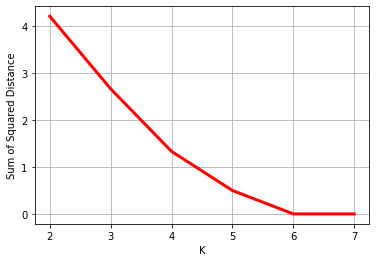

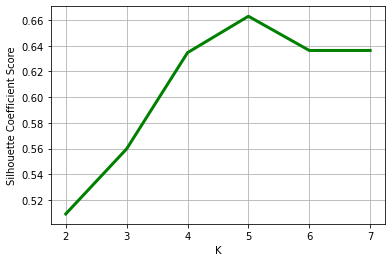

In [322]:
Bronx_grouped_clustering = Bronx_restaurant_grouped.drop('Neighborhood', 1)
cost=[]
sil_cost=[]
for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster, max_iter = 500)
    kmeans.fit(Bronx_grouped_clustering)
    cost.append(kmeans.inertia_)
    label = kmeans.labels_
    sil_cost.append(silhouette_score(Bronx_grouped_clustering, label, metric='euclidean'))
    
plt.plot(range(2,8), cost, color = 'r', linewidth='3')
plt.xlabel("K")
plt.ylabel("Sum of Squared Distance")
plt.grid()
plt.show()
plt.plot(range(2,8), sil_cost, color = 'g', linewidth='3')
plt.xlabel("K")
plt.ylabel("Silhouette Coefficient Score")
plt.grid()
plt.show()

By observing the elbow method and silhouette score, we find that the optimal number of clusters to use is K = 5

In [323]:
# set number of clusters
kclusters = 5

Bronx_grouped_clustering = Bronx_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 1, 1, 4, 1, 2, 1, 3, 0, 3], dtype=int32)

In [324]:
B_results = pd.DataFrame(kmeans.cluster_centers_)
B_results.columns = Bronx_grouped_clustering.columns
B_results.index = ['cluster0','cluster1','cluster2','cluster3','cluster4']
B_results

,Gluten Free,Halal,Kosher,Vegetarian/Vegan
cluster0,0.0,1.0,0.0,0.0
cluster1,0.0,0.0,0.0,1.0
cluster2,0.0,0.0,1.0,0.0
cluster3,1.0,0.0,0.0,0.5
cluster4,0.0,0.0,0.0,2.0


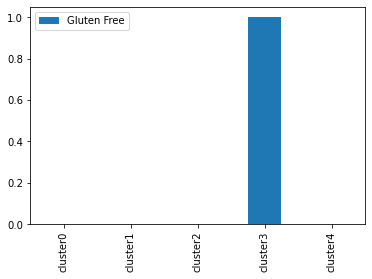

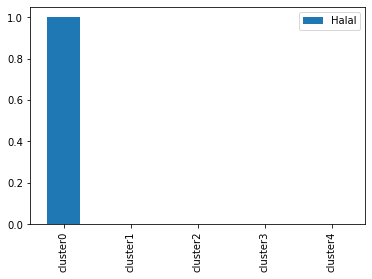

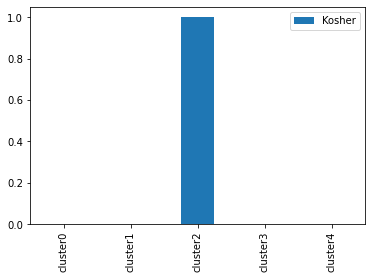

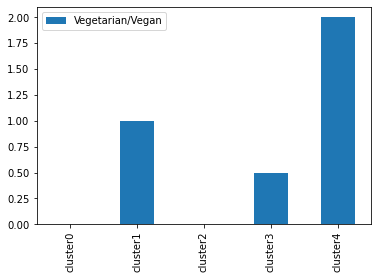

In [325]:
B_results.plot( y=['Gluten Free'], kind = 'bar')
plt.show()
B_results.plot( y=['Halal'], kind = 'bar')
plt.show()
B_results.plot( y=['Kosher'], kind = 'bar')
plt.show()
B_results.plot( y=['Vegetarian/Vegan'], kind = 'bar')
plt.show()

#### From the charts above,
#### Cluster 0 - best for Halal Restaurants
#### Cluster 1 - best for Vegan/Vegetarian Restaurants
#### Cluster 2 - best for Kosher
#### Cluster 3 - best for Gluten Free
#### Cluster 4 - best for Vegan/Vegetarian Restaurants

Dataframe with Neighborhooda, Cluster No, and categories


In [337]:
B_results_merged = Bronx_restaurant_grouped.assign(Cluster_Labels = kmeans.labels_)
print(B_results_merged.shape)
# add latitude and longitude
B_results_merged = pd.merge(B_results_merged, Bronx_neigh[['Neighborhood','Latitude','Longitude']], on='Neighborhood')
B_results_merged

(11, 6)


,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan,Cluster_Labels,Latitude,Longitude
0,Bedford Park,0,1,0,0,0,40.870185,-73.885512
1,Belmont,0,0,0,1,1,40.857277,-73.888452
2,Bronxdale,0,0,0,1,1,40.852723,-73.861726
3,Country Club,0,0,0,1,1,40.844246,-73.824099
4,Fordham,0,0,0,2,4,40.860997,-73.896427
5,Kingsbridge,0,0,0,1,1,40.881687,-73.902818
6,North Riverdale,0,0,1,0,2,40.908543,-73.904531
7,Olinville,0,0,0,1,1,40.871371,-73.863324
8,Parkchester,1,0,0,1,3,40.837938,-73.856003
9,Unionport,0,1,0,0,0,40.829774,-73.850535


In [359]:
# create map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[Bronx_latitude, Bronx_longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, Cluster_Labels in zip(B_results_merged['Latitude'], B_results_merged['Longitude'], B_results_merged['Neighborhood'], B_results_merged['Cluster_Labels']):
    label = '{}, {}'.format(neighborhood, Cluster_Labels)
    label = folium.Popup(label, parse_html=True)
    if( Cluster_Labels == 0):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bronx)
    elif( Cluster_Labels == 1):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bronx)
    elif( Cluster_Labels == 2):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bronx)  
    elif( Cluster_Labels == 3):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bronx)  
    elif( Cluster_Labels == 4):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='brown',
            fill=True,
            fill_color='brown',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bronx)         
map_bronx       

#### Manhattan

Clustering

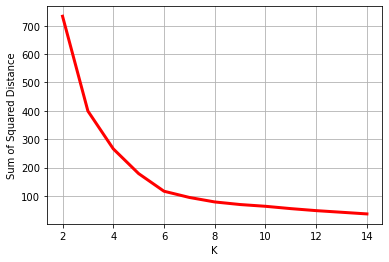

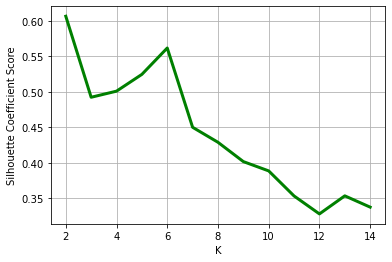

In [314]:
Manhattan_grouped_clustering = Manhattan_restaurant_grouped.drop('Neighborhood', 1)
cost=[]
sil_cost=[]
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster, max_iter = 500)
    kmeans.fit(Manhattan_grouped_clustering)
    cost.append(kmeans.inertia_)
    label = kmeans.labels_
    sil_cost.append(silhouette_score(Manhattan_grouped_clustering, label, metric='euclidean'))
    
plt.plot(range(2,15), cost, color = 'r', linewidth='3')
plt.xlabel("K")
plt.ylabel("Sum of Squared Distance")
plt.grid()
plt.show()
plt.plot(range(2,15), sil_cost, color = 'g', linewidth='3')
plt.xlabel("K")
plt.ylabel("Silhouette Coefficient Score")
plt.grid()
plt.show()


By observing the elbow method and silhouette score, we find that the optimal number of clusters to use is K = 6

In [349]:
# set number of clusters
kclusters = 6

Manhattan_grouped_clustering = Manhattan_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 5, 4, 5, 5, 0, 1, 5, 3, 5, 3, 0, 0, 0, 1, 0, 0, 0, 2, 4,
       2, 3, 0, 1, 5, 0, 5, 5, 5, 5, 0, 4, 0], dtype=int32)

In [350]:
M_results = pd.DataFrame(kmeans.cluster_centers_)
M_results.columns = Manhattan_grouped_clustering.columns
M_results.index = ['cluster0','cluster1','cluster2','cluster3','cluster4','cluster5']
M_results

,Gluten Free,Halal,Kosher,Vegetarian/Vegan
cluster0,0.214286,0.714286,0.357143,1.500000
cluster1,2.000000,4.666667,0.666667,19.666667
cluster2,3.500000,1.000000,7.500000,11.000000
cluster3,3.333333,2.666667,2.000000,26.000000
cluster4,1.333333,0.666667,0.666667,14.666667
cluster5,0.900000,1.500000,1.300000,7.300000


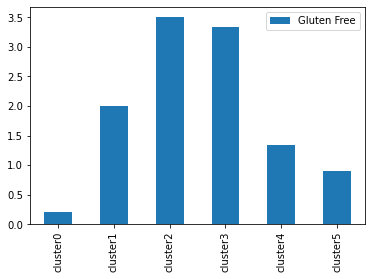

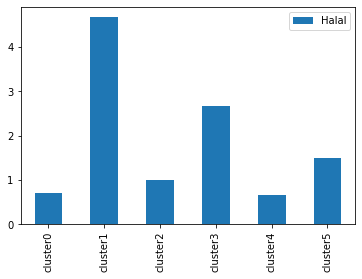

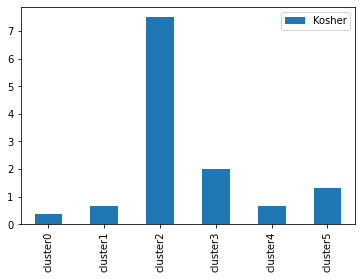

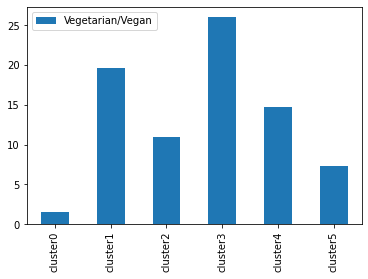

In [351]:
M_results.plot( y=['Gluten Free'], kind = 'bar')
plt.show()
M_results.plot( y=['Halal'], kind = 'bar')
plt.show()
M_results.plot( y=['Kosher'], kind = 'bar')
plt.show()
M_results.plot( y=['Vegetarian/Vegan'], kind = 'bar')
plt.show()

#### From the charts above,
#### Cluster 0 - not recommended for our diets
#### Cluster 1 - best for Vegan/Vegetarian and Halal Restaurants
#### Cluster 2 - best for Gluten Free and Kosher
#### Cluster 3 - good for all four diets but best for Vegan/Vegetarian
#### Cluster 4 - good for Vegan/Vegetarian
#### Cluster 5 - low availability of restaurants

Dataframe with Neighborhooda, Cluster No, and categories


In [352]:
M_results_merged = Manhattan_restaurant_grouped.assign(Cluster_Labels = kmeans.labels_)
print(M_results_merged.shape)
M_results_merged = pd.merge(M_results_merged, Manhattan_neigh[['Neighborhood','Latitude','Longitude']], on='Neighborhood')
M_results_merged

(35, 6)


,Neighborhood,Gluten Free,Halal,Kosher,Vegetarian/Vegan,Cluster_Labels,Latitude,Longitude
0,Battery Park City,0,0,0,1,0,40.711932,-74.016869
1,Carnegie Hill,1,0,1,4,0,40.782683,-73.953256
2,Central Harlem,0,3,0,1,0,40.815976,-73.943211
3,Chelsea,1,2,0,7,5,40.744035,-74.003116
4,Chinatown,0,1,0,16,4,40.715618,-73.994279
5,Civic Center,1,2,1,6,5,40.715229,-74.005415
6,Clinton,2,1,0,6,5,40.759101,-73.996119
7,East Harlem,0,2,1,1,0,40.792249,-73.944182
8,East Village,2,5,1,19,1,40.727847,-73.982226
9,Financial District,1,3,1,9,5,40.707107,-74.010665


Visualize Data 

In [357]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, Cluster_Labels in zip(M_results_merged['Latitude'], M_results_merged['Longitude'], M_results_merged['Neighborhood'], M_results_merged['Cluster_Labels']):
    label = '{}, {}'.format(neighborhood, Cluster_Labels)
    label = folium.Popup(label, parse_html=True)
    if( Cluster_Labels == 0):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_manhattan)
    elif( Cluster_Labels == 1):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_manhattan)
    elif( Cluster_Labels == 2):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.7,
            parse_html=False).add_to(map_manhattan)  
    elif( Cluster_Labels == 3):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='white',
            fill=True,
            fill_color='white',
            fill_opacity=0.7,
            parse_html=False).add_to(map_manhattan)  
    elif( Cluster_Labels == 4):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='brown',
            fill=True,
            fill_color='brown',
            fill_opacity=0.7,
            parse_html=False).add_to(map_manhattan)  
    elif( Cluster_Labels == 5):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.7,
            parse_html=False).add_to(map_manhattan)         
map_manhattan       